1. Se importa la liberia

In [6]:
from sklearn.datasets import load_breast_cancer

2. En una variable se guarda el dataset que previamente se importo
3. Se le asignan a X los valores (rows) que tiene el dataset que pues en este caso x = a todos los datos que tiene el csv
   a y se le asigna el target.
   target es una columna que viene definida en el csv, se reconoce automaticamente por pandas siempre y cuando la columna se llame target

In [7]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target


Se importa pandas para poder manejar los datos
Primero se crea el dataFrame que es donde se van a guardar los datos, este recibe X que tiene toda la data del csv y tambien recibe los nombres de cada columna, en este caso el csv tiene los nombres de las columnas en "breast_cancer.feature_names"

In [8]:
import pandas as pd

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Se importa una funcion de sklearn que lo que hace es dividir todo el dataset en 4 partes:
X_train: Son las filas con las que se entrenara el algoritmo
X_test: Son las filas que se usaran para probar el algoritmo
Y_train: Son los resultados de cada una de las filas, con estos resultados el algoritmo aprendera
Y_test: Son los resultados con los que comprobaremos los resultados arrojados por la neurona

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, stratify = Y)
print("Tamaño del conjunto de datos de entrenamiento", len(X_train))
print("Tamaño del conjunto de datos de pruebas", len(X_test))

Tamaño del conjunto de datos de entrenamiento 426
Tamaño del conjunto de datos de pruebas 143


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:
    #SE DEFINE EL TRESHOLD
    def __init__(self):
        self.threshold = None

    #ITERA SOBRE X Y VA SUMANDO LOS RESULTADOS
    def model(self, x):
        return (sum(x) >= self.threshold)

    # ITERA SOBRE EL CAD
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        #Esto es un diccionario, no una arreglo
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)
        # Seleccionamos el threshold que mejores resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


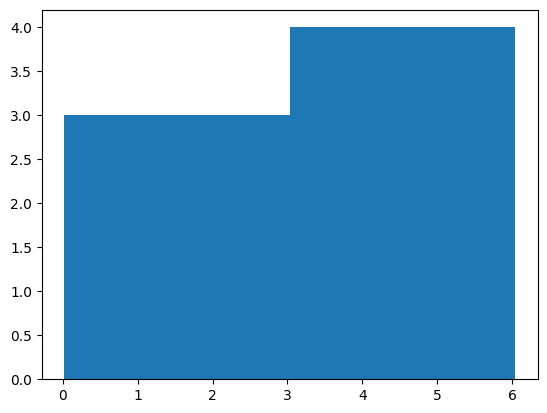

In [19]:
import matplotlib.pyplot as plit

#Metodo que transforma un arreglo de datos, lo divide en 2 intervalos y asigna en base a eso lo que este en labels
print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0,1]))

plit.hist([6.04, 0.3, 4, 5, 6, 0.02, 0.6], bins=2)
plit.show()

Lo que se esta haciendo es que el conjunto de datos que le pasas lo divide en 2 de acuerdo al rango, en este caso seria de 0 al 6 (se define automaticamente).
Entonces lo que hara el algoritmo es que  los numeros menores o iguales a 3 les pondra un valor y a los mayores otro valor, en este caso los reemplaza por 0 y 1 que los 
especificas en la propiedad labels

In [30]:
x_test_bin = X_test.apply(pd.cut, bins = 2, labels = [1,0])
X_train_bin = X_train.apply(pd.cut, bins = 2, labels = [1,0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
528,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
53,0,1,0,1,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
369,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,1,1,1,0,1,1
286,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
444,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
211,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
220,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


Ahora se aplica ese mismo algoritmo pero a las x de test y de entrenamiento

In [31]:
neurona = MPNeuron()
neurona.fit(X_train_bin.to_numpy(), Y_train)
neurona.threshold

27

Ahora si tomando el treshold que es el numero de caracteristicas que debe de tener un registro para poder predecir si tiene cancer o no
hacemos la prediccion de los datos 

In [33]:
y_pred = neurona.predict(x_test_bin.to_numpy())

Aqui verificamos con los resultados de test que tan precisa fue la neurona

In [35]:
accuracy_score(Y_test, y_pred)

0.8741258741258742

Esta es otra forma de verificar los datos

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[42, 11],
       [ 7, 83]], dtype=int64)